Importing libraries

In [1]:
import pandas as pd  #import library
import numpy as np
import geopandas as pgd
import os
import sqlite3

SouthEast Texas County

In [36]:
os.chdir('C:\\Users\\nimes\\Desktop\\Project 2\\Data') #change directory
county = pgd.read_file('SouthEastTexasCounty.shp') #read file
#county.plot(figsize=(10,10)) #plot of county
county.crs #projection system

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Roads

<AxesSubplot:>

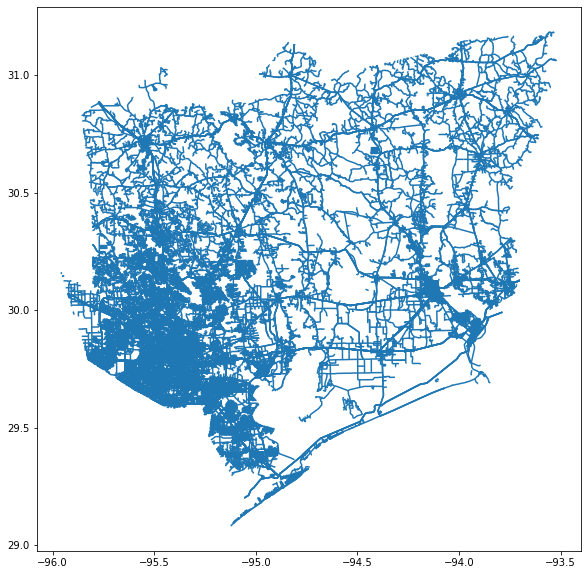

In [47]:
os.chdir('C:\\Users\\nimes\\Desktop\\Project 2\\Data') #change directory
roadways = pgd.read_file('SouthEastTexasRoads.shp')  #read file
roadways.plot(figsize=(10,10)) #plot of roadways
#roadways.crs   #projection sysm

Airport

In [3]:
os.chdir('C:\\Users\\nimes\\Desktop\\Project 2\\Data\\Shape')  #set directory
airports = pgd.read_file('SouthEastTexasAirports.shp')   #airport data
#airports.plot(figsize=(10,10))
airports.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Railways

In [4]:
os.chdir('C:\\Users\\nimes\\Desktop\\Project 2\\Data\\Texas_Railroads')
railway = pgd.read_file('SouthEastTexasRailways.shp')
#railway.plot(figsize=(10,10))
railway.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

importing CSV file

In [5]:
os.chdir('C:\\Users\\nimes\\Desktop\\Project 2\\Data')    #read csv file
roads = pd.read_csv('SouthEastTexasRoads.csv',low_memory=False)

In [6]:
os.chdir('C:\\Users\\nimes\\Desktop\\Project 2\\Data\\Shape')
airports = pd.read_csv('SouthEastTexasAirports.csv')
airports = airports.rename(columns={'OBJECTID':'OBJECTID_1'})#renaming same column name 

In [7]:
os.chdir('C:\\Users\\nimes\\Desktop\\Project 2\\Data\\Texas_Railroads')
rails = pd.read_csv('SouthEastTexasRailways.csv')

sqlite3 part

In [8]:
connection = sqlite3.connect('C:\\Users\\nimes\\Desktop\\Project 2\\Data\\TXSE\\TXSE.db')  #create database to cinnect sql query
cur = connection.cursor()

In [22]:
#cur.execute("""drop table roads""")  #drop the table

In [9]:
roads.to_sql('roads',connection,if_exists='replace',index=False)#connecting to TXSE database

97957

In [10]:
airports.to_sql('airports',connection,if_exists='replace',index=False)

267

In [11]:
rails.to_sql('railway',connection,if_exists='replace',index=False)

2800

In [12]:
connection.commit()  #end connection

In [13]:
cur = connection.cursor()   #define cursor to execute query 

relational road data

In [15]:
cur.execute("""drop table r1""")  #drop table
cur.execute("""drop table r2""")

In [16]:
c2 = """CREATE TABLE r1 (                
ID INTEGER AUTO_INCREMENT PRIMARY KEY,
OBJECTID_left integer,
RDBD_TYPE text,
CNTY_NM text,
RTE_NBR integer,
geometry
);"""
cur.execute(c2)                #relational data table 1 , auto increment, primary key

In [17]:
cur.execute("""CREATE TABLE r2 (
ID INTEGER,
RDWAY_STAT text,
FIPS_ST_CN INTEGER,
SHAPE_Leng_left FLOAT,
FOREIGN KEY (ID) REFERENCES r1(ID) 
);""")                     #relational data table 2 , foreign key from table 1 

In [19]:
cur.execute("""INSERT INTO r1(OBJECTID_left, RDBD_TYPE, CNTY_NM, RTE_NBR, geometry)
SELECT OBJECTID_left, RDBD_TYPE, CNTY_NM, RTE_NBR, geometry FROM roads;""")
cur.execute("""INSERT INTO r2(RDWAY_STAT, FIPS_ST_CN, SHAPE_Leng_left)
SELECT RDWAY_STAT, FIPS_ST_CN, SHAPE_Leng_left FROM roads;""")

#connection.commit()              #insert data from roads 

In [20]:
for row in cur.execute('SELECT geometry FROM r1,r2 where FIPS_ST_CN = 48407 and RTE_NBR = 59 group by RDBD_TYPE'):
    print(row)   #execute query

('LINESTRING (-94.98714376899994 30.50105440200008, -94.98727605899995 30.501106081000046, -94.98738041899998 30.50116993100005, -94.98743873999996 30.501245092000033, -94.98746021899996 30.50129577200005)',)
('LINESTRING (-94.93211363599994 30.733478611000066, -94.93156653599999 30.732982520000064, -94.93117475599996 30.73261977100003)',)
('LINESTRING (-94.98666235899998 30.512860144000058, -94.98660844899996 30.51283757400006, -94.98653695999997 30.512798434000047, -94.98648163899998 30.512754784000037, -94.98646440899995 30.51274012400006, -94.98635377899996 30.51260938400003, -94.98632994899998 30.512569814000074, -94.98631168999998 30.512535054000068, -94.98629295999996 30.512486524000053, -94.98628508899998 30.51246391400008, -94.98627320999998 30.512397304000046, -94.98626707899996 30.512361733000034, -94.98626551899997 30.51232314400005, -94.98626974999996 30.512255563000053, -94.98628426999994 30.512169164000056, -94.98664726999999 30.510586163000028, -94.98686340999996 30.509

('LINESTRING (-94.86191426399995 30.836540244000048, -94.86189512299995 30.836555734000058, -94.86179504299997 30.836637074000066, -94.86173259299994 30.836672544000066, -94.86167884299994 30.83670419400005, -94.86161790299997 30.836732324000025, -94.86153571299997 30.83675877400003, -94.86143251299995 30.83678995400004, -94.86135075299995 30.836809364000032, -94.86125914299998 30.836826544000076, -94.86118444299996 30.836835674000042, -94.86110966299998 30.83683809400003, -94.86105398299998 30.836835834000055, -94.86099297299995 30.836828644000036, -94.86091213299994 30.836816234000025, -94.86075550299995 30.836777864000055, -94.86056554299995 30.836730034000027, -94.86045836299996 30.836707404000038, -94.86041232299999 30.83670309400003, -94.86036628299996 30.836704524000027, -94.86031176299997 30.836716274000025, -94.86026924299995 30.836728794000067, -94.86022517299995 30.836746265000045, -94.86018025299995 30.836767054000063, -94.86014670299994 30.836787124000068, -94.860115892999

('LINESTRING (-94.81007356037837 31.132926746864385, -94.81047538499996 31.131067035000058, -94.81058557499995 31.130590425000037, -94.81065405499999 31.13010695500003, -94.81071155499995 31.12982477500003, -94.81072312499998 31.129282105000073, -94.81080770499995 31.127842335000025, -94.81087847399999 31.125230375000058, -94.81174558299995 31.103935489000037, -94.81179315299994 31.103356810000037, -94.81189221399995 31.10280608900007, -94.81200898399999 31.10224598900004, -94.81211929399996 31.101697099000035, -94.81227106399996 31.101125180000054, -94.81397269299998 31.095685528000047, -94.81403765299996 31.095470178000028, -94.81498905399997 31.092412078000052, -94.81684331399998 31.086484506000033, -94.82004150399996 31.076326704000053, -94.82391116399998 31.06392961100005, -94.82520209499995 31.059734551000076, -94.82539682499998 31.058978060000072, -94.82547262499997 31.05843868000005, -94.82554577399998 31.057900060000065, -94.82560078499995 31.057354349000036, -94.8256402349999

In [21]:
connection.commit()

In [22]:
cur.execute("""drop table a1""")
cur.execute("""drop table a2""")

In [23]:
c1 = """CREATE TABLE a1 (
ID INTEGER AUTO_INCREMENT PRIMARY KEY,
fcode integer,
faa_airpor char(40),
ownertype integer,
CNTY_NM text,
geometry
);"""
cur.execute(c1)

In [24]:
cur.execute("""CREATE TABLE a2 (
ID INTEGER,
name char(40),
FIPS_ST_CN INTEGER,
ObjectID INTEGER,
FOREIGN KEY (ID) REFERENCES a1(ID) 
);""")

In [25]:
cur.execute("""INSERT INTO a1(fcode, faa_airpor,ownertype, CNTY_NM, geometry)
SELECT fcode, faa_airpor, ownertype, CNTY_NM, geometry FROM airports;""")
cur.execute("""INSERT INTO a2(name, FIPS_ST_CN, ObjectID)
SELECT name, FIPS_ST_CN, ObjectID FROM airports;""")

In [26]:
for row in cur.execute('SELECT geometry FROM a1 where CNTY_NM = "Jasper"'):
    print(row)

('POINT (-93.91356357612608 30.643957449309426)',)
('POINT (-93.91412003133354 30.645330019098935)',)
('POINT (-93.91534003133165 30.64722001909604)',)
('POINT (-94.03495115510441 30.885699918725777)',)
('POINT (-94.03610768635264 30.891602142674913)',)
('POINT (-94.0728966185871 30.320357449811695)',)
('POINT (-94.07564666024945 30.326396099802366)',)


In [27]:
connection.commit()

relational railways data

In [28]:
cur.execute("""drop table rail1""")
cur.execute("""drop table rail2""")

In [29]:
c1 = """CREATE TABLE rail1 (
ID INTEGER AUTO_INCREMENT PRIMARY KEY,
RR_NBR integer,
RR_COMPANY text,
RR_TYP text,
CNTY_NM text,
geometry
);"""
cur.execute(c1)

In [30]:
cur.execute("""CREATE TABLE rail2 (
ID INTEGER,
RR_STATUS text,
FIPS_ST_CN INTEGER,
OBJECTID_left INTEGER,
SHAPE_Leng_left FLOAT,
FOREIGN KEY (ID) REFERENCES a1(ID) 
);""")

In [31]:
cur.execute("""INSERT INTO rail1(RR_NBR, RR_COMPANY,RR_TYP, CNTY_NM, geometry)
SELECT RR_NBR, RR_COMPANY, RR_TYP, CNTY_NM, geometry FROM railway;""")
cur.execute("""INSERT INTO rail2(RR_STATUS, FIPS_ST_CN, OBJECTID_left, SHAPE_Leng_left)
SELECT RR_STATUS, FIPS_ST_CN, OBJECTID_left, SHAPE_Leng_left FROM railway;""")

In [32]:
for row in cur.execute('SELECT geometry, RR_STATUS FROM rail1,rail2 where RR_STATUS = "Pulled" and FIPS_ST_CN = 48241'):
    print(row)

('LINESTRING (-93.95135299199995 30.452658143000065, -93.95098289999999 30.452928001000032, -93.95057592899997 30.453199709000046, -93.95031518599995 30.453388533000066, -93.94998812299997 30.45364247400005, -93.94993007399995 30.453707981000036, -93.94988488099995 30.453766916000063, -93.94984751099997 30.453833403000033, -93.94950144799998 30.45465049300003, -93.94869388799998 30.45666720500003)', 'Pulled')
('LINESTRING (-93.95135299199995 30.452658143000065, -93.95098289999999 30.452928001000032, -93.95057592899997 30.453199709000046, -93.95031518599995 30.453388533000066, -93.94998812299997 30.45364247400005, -93.94993007399995 30.453707981000036, -93.94988488099995 30.453766916000063, -93.94984751099997 30.453833403000033, -93.94950144799998 30.45465049300003, -93.94869388799998 30.45666720500003)', 'Pulled')
('LINESTRING (-93.95135299199995 30.452658143000065, -93.95098289999999 30.452928001000032, -93.95057592899997 30.453199709000046, -93.95031518599995 30.453388533000066, -93.

('LINESTRING (-95.29091709199997 29.79655622100006, -95.29091198599997 29.796572140000023, -95.29082106299995 29.79675132600005)', 'Pulled')
('LINESTRING (-95.29091709199997 29.79655622100006, -95.29091198599997 29.796572140000023, -95.29082106299995 29.79675132600005)', 'Pulled')
('LINESTRING (-95.29091709199997 29.79655622100006, -95.29091198599997 29.796572140000023, -95.29082106299995 29.79675132600005)', 'Pulled')
('LINESTRING (-95.29082106299995 29.79675132600005, -95.29074473099996 29.796863598000073, -95.29064854499995 29.79698012700004)', 'Pulled')
('LINESTRING (-95.29082106299995 29.79675132600005, -95.29074473099996 29.796863598000073, -95.29064854499995 29.79698012700004)', 'Pulled')
('LINESTRING (-95.29082106299995 29.79675132600005, -95.29074473099996 29.796863598000073, -95.29064854499995 29.79698012700004)', 'Pulled')
('LINESTRING (-95.29115530099995 29.796917164000035, -95.29133592699998 29.796907137000062, -95.29152085099997 29.796911657000066)', 'Pulled')
('LINESTRIN

('LINESTRING (-95.30512073699998 29.76303193800004, -95.30196353299999 29.76214051200003)', 'Pulled')
('LINESTRING (-95.35192652399996 29.763382309000065, -95.35175271199995 29.763223975000074, -95.35043539499998 29.761890536000067)', 'Pulled')
('LINESTRING (-95.35192652399996 29.763382309000065, -95.35175271199995 29.763223975000074, -95.35043539499998 29.761890536000067)', 'Pulled')
('LINESTRING (-95.35192652399996 29.763382309000065, -95.35175271199995 29.763223975000074, -95.35043539499998 29.761890536000067)', 'Pulled')
('LINESTRING (-95.32508328799997 29.766114729000037, -95.32530737299999 29.766081230000054, -95.32550096699998 29.766030030000024, -95.32569398599998 29.76595325900007, -95.32586923699995 29.765856823000036, -95.32602824799994 29.76574090200006, -95.32617123299997 29.765604172000053, -95.32628900699996 29.765455420000023, -95.32638497199997 29.765290372000038, -95.32643625599997 29.765169185000047, -95.32647407099995 29.765044303000025, -95.32649808299999 29.764916

('LINESTRING (-95.27629218999994 29.73398972800004, -95.27633630699995 29.73412107200005, -95.27693683799998 29.735351322000042)', 'Pulled')
('LINESTRING (-95.27629218999994 29.73398972800004, -95.27633630699995 29.73412107200005, -95.27693683799998 29.735351322000042)', 'Pulled')
('LINESTRING (-95.27611320199998 29.735651653000048, -95.27568057699995 29.73474834600006, -95.27554179599997 29.734345159000043)', 'Pulled')
('LINESTRING (-95.27611320199998 29.735651653000048, -95.27568057699995 29.73474834600006, -95.27554179599997 29.734345159000043)', 'Pulled')
('LINESTRING (-95.27611320199998 29.735651653000048, -95.27568057699995 29.73474834600006, -95.27554179599997 29.734345159000043)', 'Pulled')
('LINESTRING (-95.27532294399998 29.734187311000028, -95.27553205099997 29.734794760000057, -95.27610041799994 29.73598153000006)', 'Pulled')
('LINESTRING (-95.27532294399998 29.734187311000028, -95.27553205099997 29.734794760000057, -95.27610041799994 29.73598153000006)', 'Pulled')
('LINEST

('LINESTRING (-95.19037494599996 29.615376723000054, -95.19024009699996 29.615271149000023, -95.19012555799998 29.61519325200004, -95.18999626999994 29.61511878400006, -95.18986048799997 29.615053748000037, -95.18971612799999 29.614997474000063, -95.18956695199995 29.614951865000023, -95.18940763499995 29.614916019000077, -95.18926890999995 29.61489666800003, -95.18898782399998 29.614879905000066, -95.18723987199996 29.614917218000073)', 'Pulled')
('LINESTRING (-95.19037494599996 29.615376723000054, -95.19024009699996 29.615271149000023, -95.19012555799998 29.61519325200004, -95.18999626999994 29.61511878400006, -95.18986048799997 29.615053748000037, -95.18971612799999 29.614997474000063, -95.18956695199995 29.614951865000023, -95.18940763499995 29.614916019000077, -95.18926890999995 29.61489666800003, -95.18898782399998 29.614879905000066, -95.18723987199996 29.614917218000073)', 'Pulled')
('LINESTRING (-95.19037494599996 29.615376723000054, -95.19024009699996 29.615271149000023, -95.

('LINESTRING (-95.44488613799996 29.78980921400006, -95.44134808399997 29.787242539000033)', 'Pulled')
('LINESTRING (-95.44488613799996 29.78980921400006, -95.44134808399997 29.787242539000033)', 'Pulled')
('LINESTRING (-95.44488613799996 29.78980921400006, -95.44134808399997 29.787242539000033)', 'Pulled')
('LINESTRING (-95.46165937099994 29.788212385000065, -95.46161566699999 29.788342256000078, -95.46156569699997 29.78844706800004, -95.46149857699999 29.788550573000066, -95.46142133699999 29.788641923000057, -95.46132326299994 29.78873209300008, -95.46121771699995 29.788807363000046, -95.46110235599997 29.788870725000038, -95.46097892699999 29.788921181000035, -95.46082521599999 29.788963181000042, -95.46066615399997 29.78898521900004, -95.45922130599996 29.789049866000028)', 'Pulled')
('LINESTRING (-95.46165937099994 29.788212385000065, -95.46161566699999 29.788342256000078, -95.46156569699997 29.78844706800004, -95.46149857699999 29.788550573000066, -95.46142133699999 29.788641923

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [33]:
result1 = pd.read_sql('SELECT geometry, RR_STATUS, CNTY_NM FROM rail1,rail2 where RR_STATUS = "Pulled" and FIPS_ST_CN = 48241',connection)
#make dataframe of query

In [34]:
result1

,geometry,RR_STATUS,CNTY_NM
0,LINESTRING (-93.95135299199995 30.452658143000...,Pulled,Jasper
1,LINESTRING (-93.95135299199995 30.452658143000...,Pulled,Jasper
2,LINESTRING (-93.95135299199995 30.452658143000...,Pulled,Jasper
3,LINESTRING (-93.95079898799997 30.453050785000...,Pulled,Jasper
4,LINESTRING (-93.95079898799997 30.453050785000...,Pulled,Jasper
...,...,...,...
8395,LINESTRING (-95.54632913299997 30.721083263000...,Pulled,Walker
8396,LINESTRING (-95.54632913299997 30.721083263000...,Pulled,Walker
8397,MULTILINESTRING ((-95.34959308699996 29.773305...,Pulled,Walker
8398,MULTILINESTRING ((-95.34959308699996 29.773305...,Pulled,Walker


In [46]:
merged = county.set_index('CNTY_NM').join(result1.set_index('CNTY_NM'), how='right', lsuffix='_left', rsuffix='_right')
type(merged)
merged     #plot map on county merge county and result from query

,OBJECTID,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,GID,SHAPE_Leng,SHAPE_Area,geometry_left,geometry_right,RR_STATUS
CNTY_NM,,,,,,,,,,,,
Chambers,13,36,36,48071,36,20,47,2.564857,0.209734,"POLYGON ((-94.35798 29.88355, -94.35785 29.878...",LINESTRING (-95.00802388799997 29.733367737000...,Pulled
Chambers,13,36,36,48071,36,20,47,2.564857,0.209734,"POLYGON ((-94.35798 29.88355, -94.35785 29.878...",LINESTRING (-95.00802388799997 29.733367737000...,Pulled
Chambers,13,36,36,48071,36,20,47,2.564857,0.209734,"POLYGON ((-94.35798 29.88355, -94.35785 29.878...",LINESTRING (-95.00802388799997 29.733367737000...,Pulled
Chambers,13,36,36,48071,36,20,47,2.564857,0.209734,"POLYGON ((-94.35798 29.88355, -94.35785 29.878...",LINESTRING (-94.91765426399996 29.752311533000...,Pulled
Chambers,13,36,36,48071,36,20,47,2.564857,0.209734,"POLYGON ((-94.35798 29.88355, -94.35785 29.878...",LINESTRING (-94.91765426399996 29.752311533000...,Pulled
...,...,...,...,...,...,...,...,...,...,...,...,...
Walker,53,236,236,48471,236,17,87,2.152041,0.195448,"POLYGON ((-95.43469 31.05801, -95.43461 31.049...",LINESTRING (-95.54632913299997 30.721083263000...,Pulled
Walker,53,236,236,48471,236,17,87,2.152041,0.195448,"POLYGON ((-95.43469 31.05801, -95.43461 31.049...",LINESTRING (-95.54632913299997 30.721083263000...,Pulled
Walker,53,236,236,48471,236,17,87,2.152041,0.195448,"POLYGON ((-95.43469 31.05801, -95.43461 31.049...",MULTILINESTRING ((-95.34959308699996 29.773305...,Pulled


In [45]:
from shapely.geometry import Point, linestring, polygon
#merged.set_geometry(geometry_right)
#a=pgd.GeoDataFrame(merged,crs='epsg:4326')